# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
'''# Example reading the SQL database from here

from utils import db_connect
import pandas as pd
engine = db_connect()

dataframe = pd.read_sql("Select * from books;", engine)
print(dataframe.describe())'''

In [1]:
# Example importing the CSV here
import pandas as pd 

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.
- Variables:

Pregnancies. Número de embarazos del paciente (numérico)

Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

BMI. Índice de masa corporal (numérico)

DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

Age. Edad del paciente (numérico)

Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

## Paso 2: Exploración y limpieza de datos

In [2]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

In [3]:
# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

[]
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [4]:
# Obtener las dimensiones
dataframe.shape

(768, 9)

Conclusiones:

Hay 768 registros en el DataFrame y 9 columnas

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [7]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

## Paso 3: Análisis de variables univariante

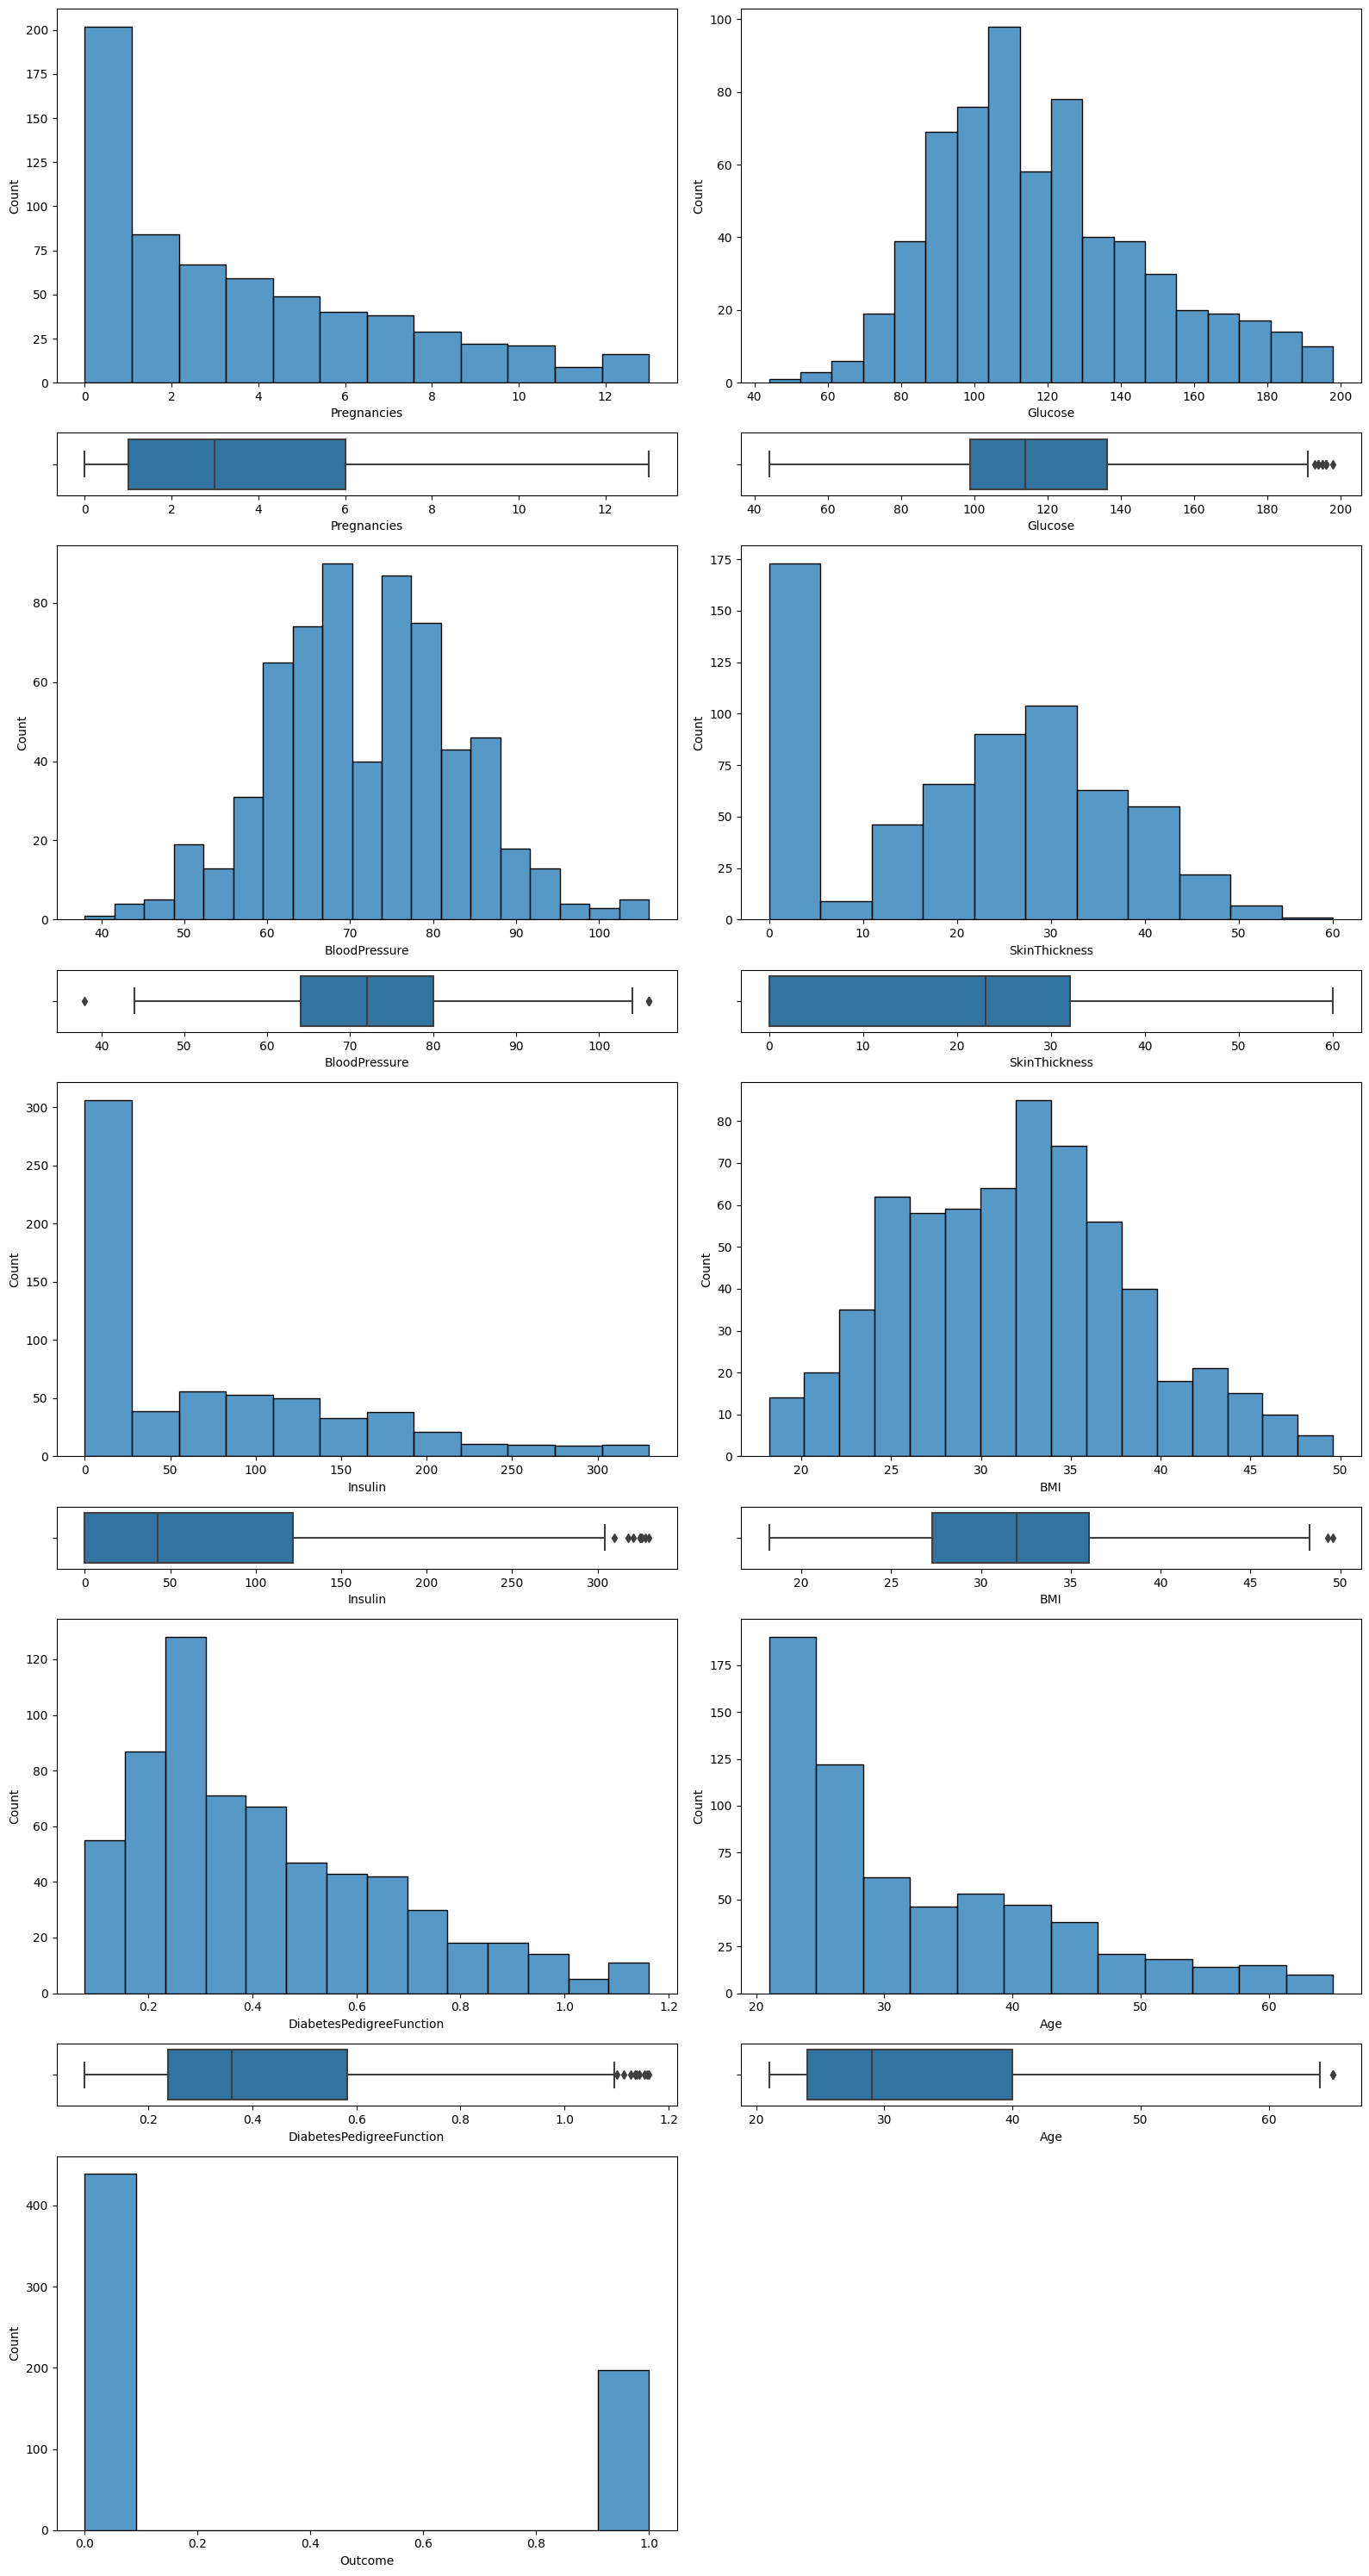

In [36]:
#Análisis sobre variables numéricas

import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 9 filas y 2 columnas
fig, axis = plt.subplots(9, 2, figsize=(16, 30), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6]})

# Gráficos de la primera sección
sns.histplot(ax=axis[0, 0], data=dataframe, x="Pregnancies")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=dataframe, x="Glucose")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="Glucose")

# Gráficos de la segunda sección
sns.histplot(ax=axis[2, 0], data=dataframe, x="BloodPressure")
sns.boxplot(ax=axis[3, 0], data=dataframe, x="BloodPressure")
sns.histplot(ax=axis[2, 1], data=dataframe, x="SkinThickness")
sns.boxplot(ax=axis[3, 1], data=dataframe, x="SkinThickness")

# Gráficos de la tercera sección
sns.histplot(ax=axis[4, 0], data=dataframe, x="Insulin")
sns.boxplot(ax=axis[5, 0], data=dataframe, x="Insulin")
sns.histplot(ax=axis[4, 1], data=dataframe, x="BMI")
sns.boxplot(ax=axis[5, 1], data=dataframe, x="BMI")

# Gráficos de la cuarta sección
sns.histplot(ax=axis[6, 0], data=dataframe, x="DiabetesPedigreeFunction")
sns.boxplot(ax=axis[7, 0], data=dataframe, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[6, 1], data=dataframe, x="Age")
sns.boxplot(ax=axis[7, 1], data=dataframe, x="Age")
sns.histplot(ax=axis[8, 0], data=dataframe, x="Outcome")

fig.delaxes(axis[8,1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

conclusion:

vemos varios outliers por debajo de 0 que debemos eliminar ya que cualquier valor por debajo de 0 no es posible en ninguna variable. 

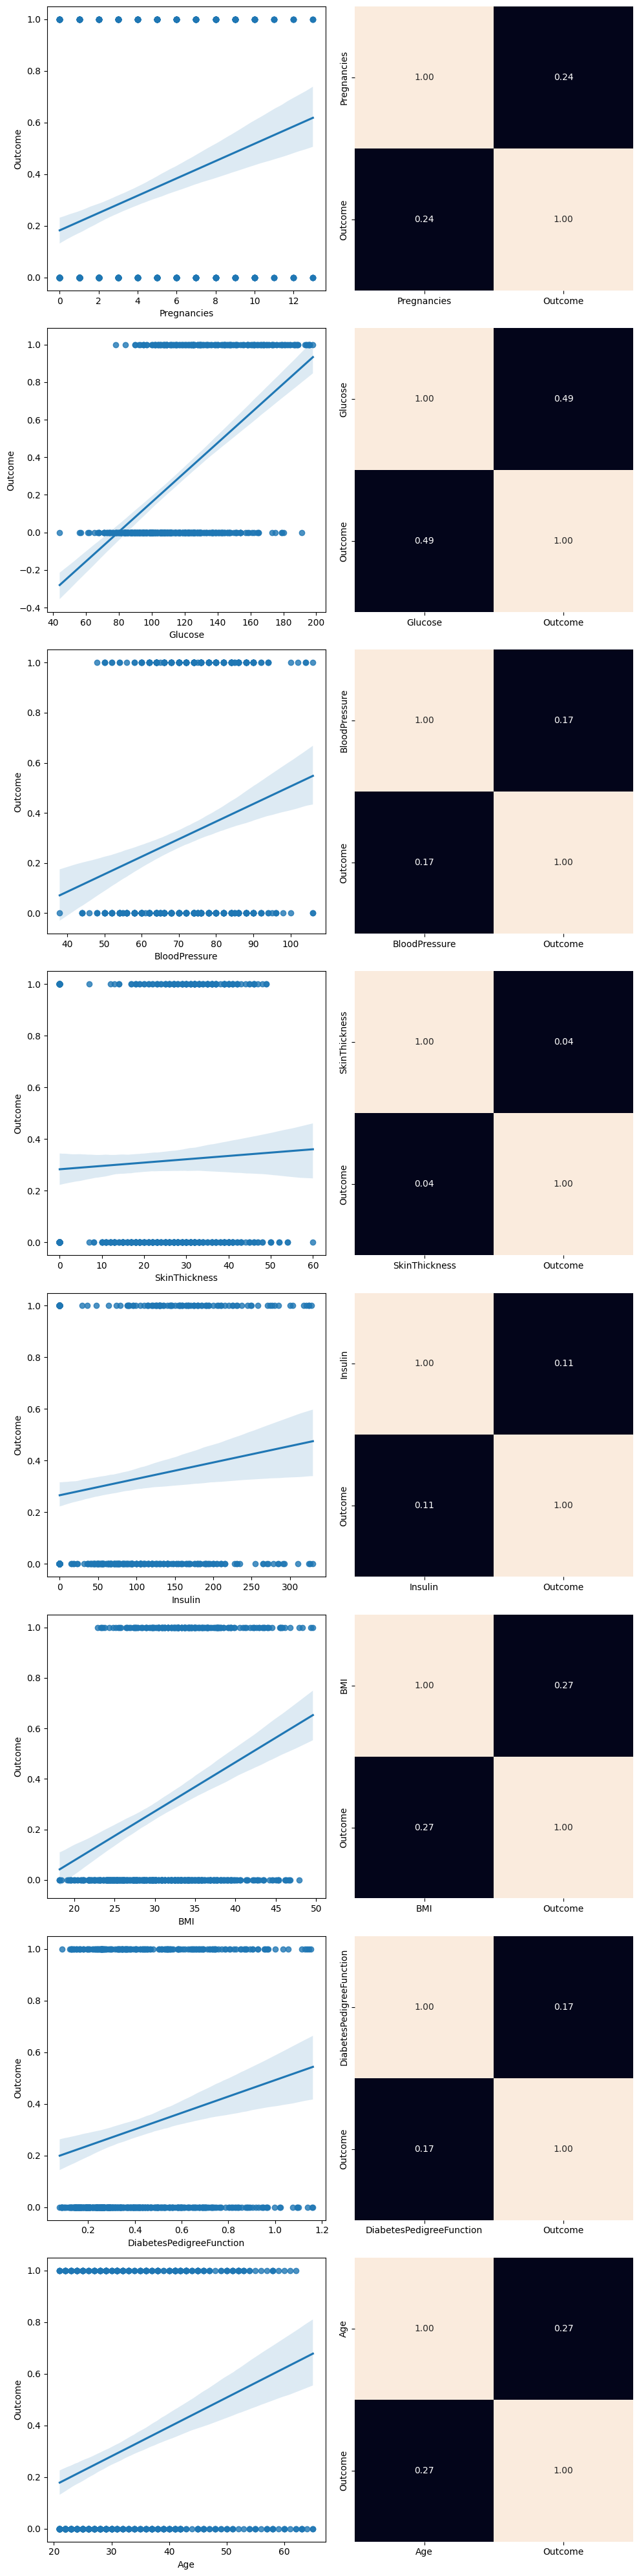

In [37]:
#analisis numerico-numerico


import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age']

# Crear una figura de subplots con configuración de filas y columnas
num_rows_diabetes = len(numeric_variables_diabetes)
fig_diabetes, axis_diabetes = plt.subplots(num_rows_diabetes, 2, figsize=(10, 5*num_rows_diabetes))

# Generar los gráficos de dispersión y las matrices de correlación para las variables numéricas
for i, var in enumerate(numeric_variables_diabetes):
    sns.regplot(ax=axis_diabetes[i, 0], data=dataframe, x=var, y="Outcome")
    sns.heatmap(dataframe[[var, "Outcome"]].corr(), annot=True, fmt=".2f", ax=axis_diabetes[i, 1], cbar=False)
    axis_diabetes[i, 0].set_ylabel("Outcome")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

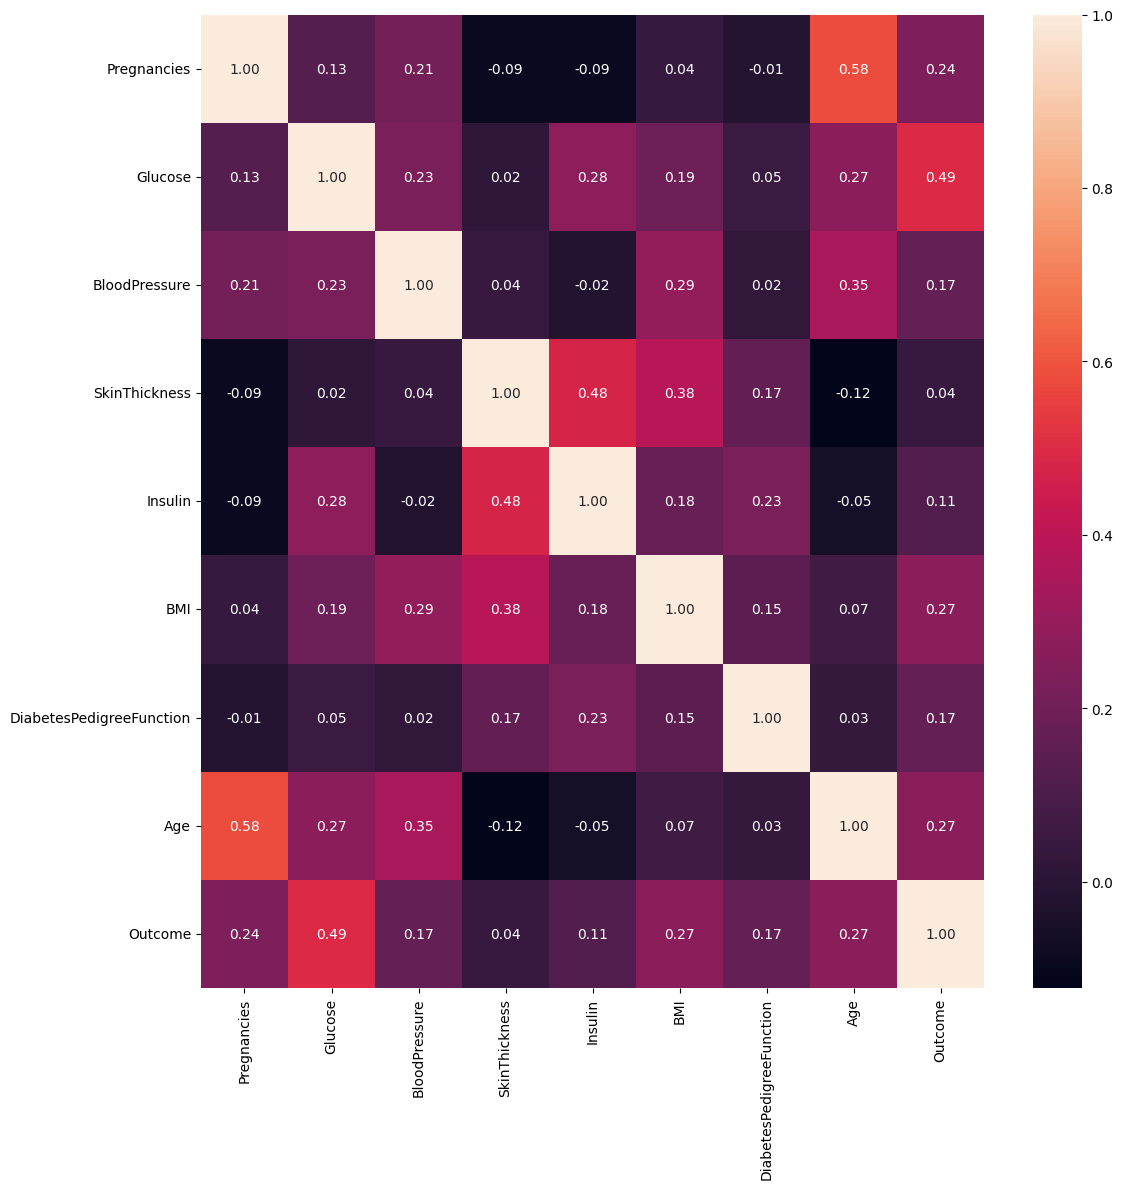

In [38]:
#analisis correlaciones

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear una figura de subplots con configuración de 1 fila y 1 columna
fig, axis = plt.subplots(figsize=(12, 12))

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = dataframe[numeric_variables].corr()

# Generar el heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=axis)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

conclusiones:
- vemos buena relacion entre pregnancies y age, entre glucose y outcome, y  entre skinthickness e insulina

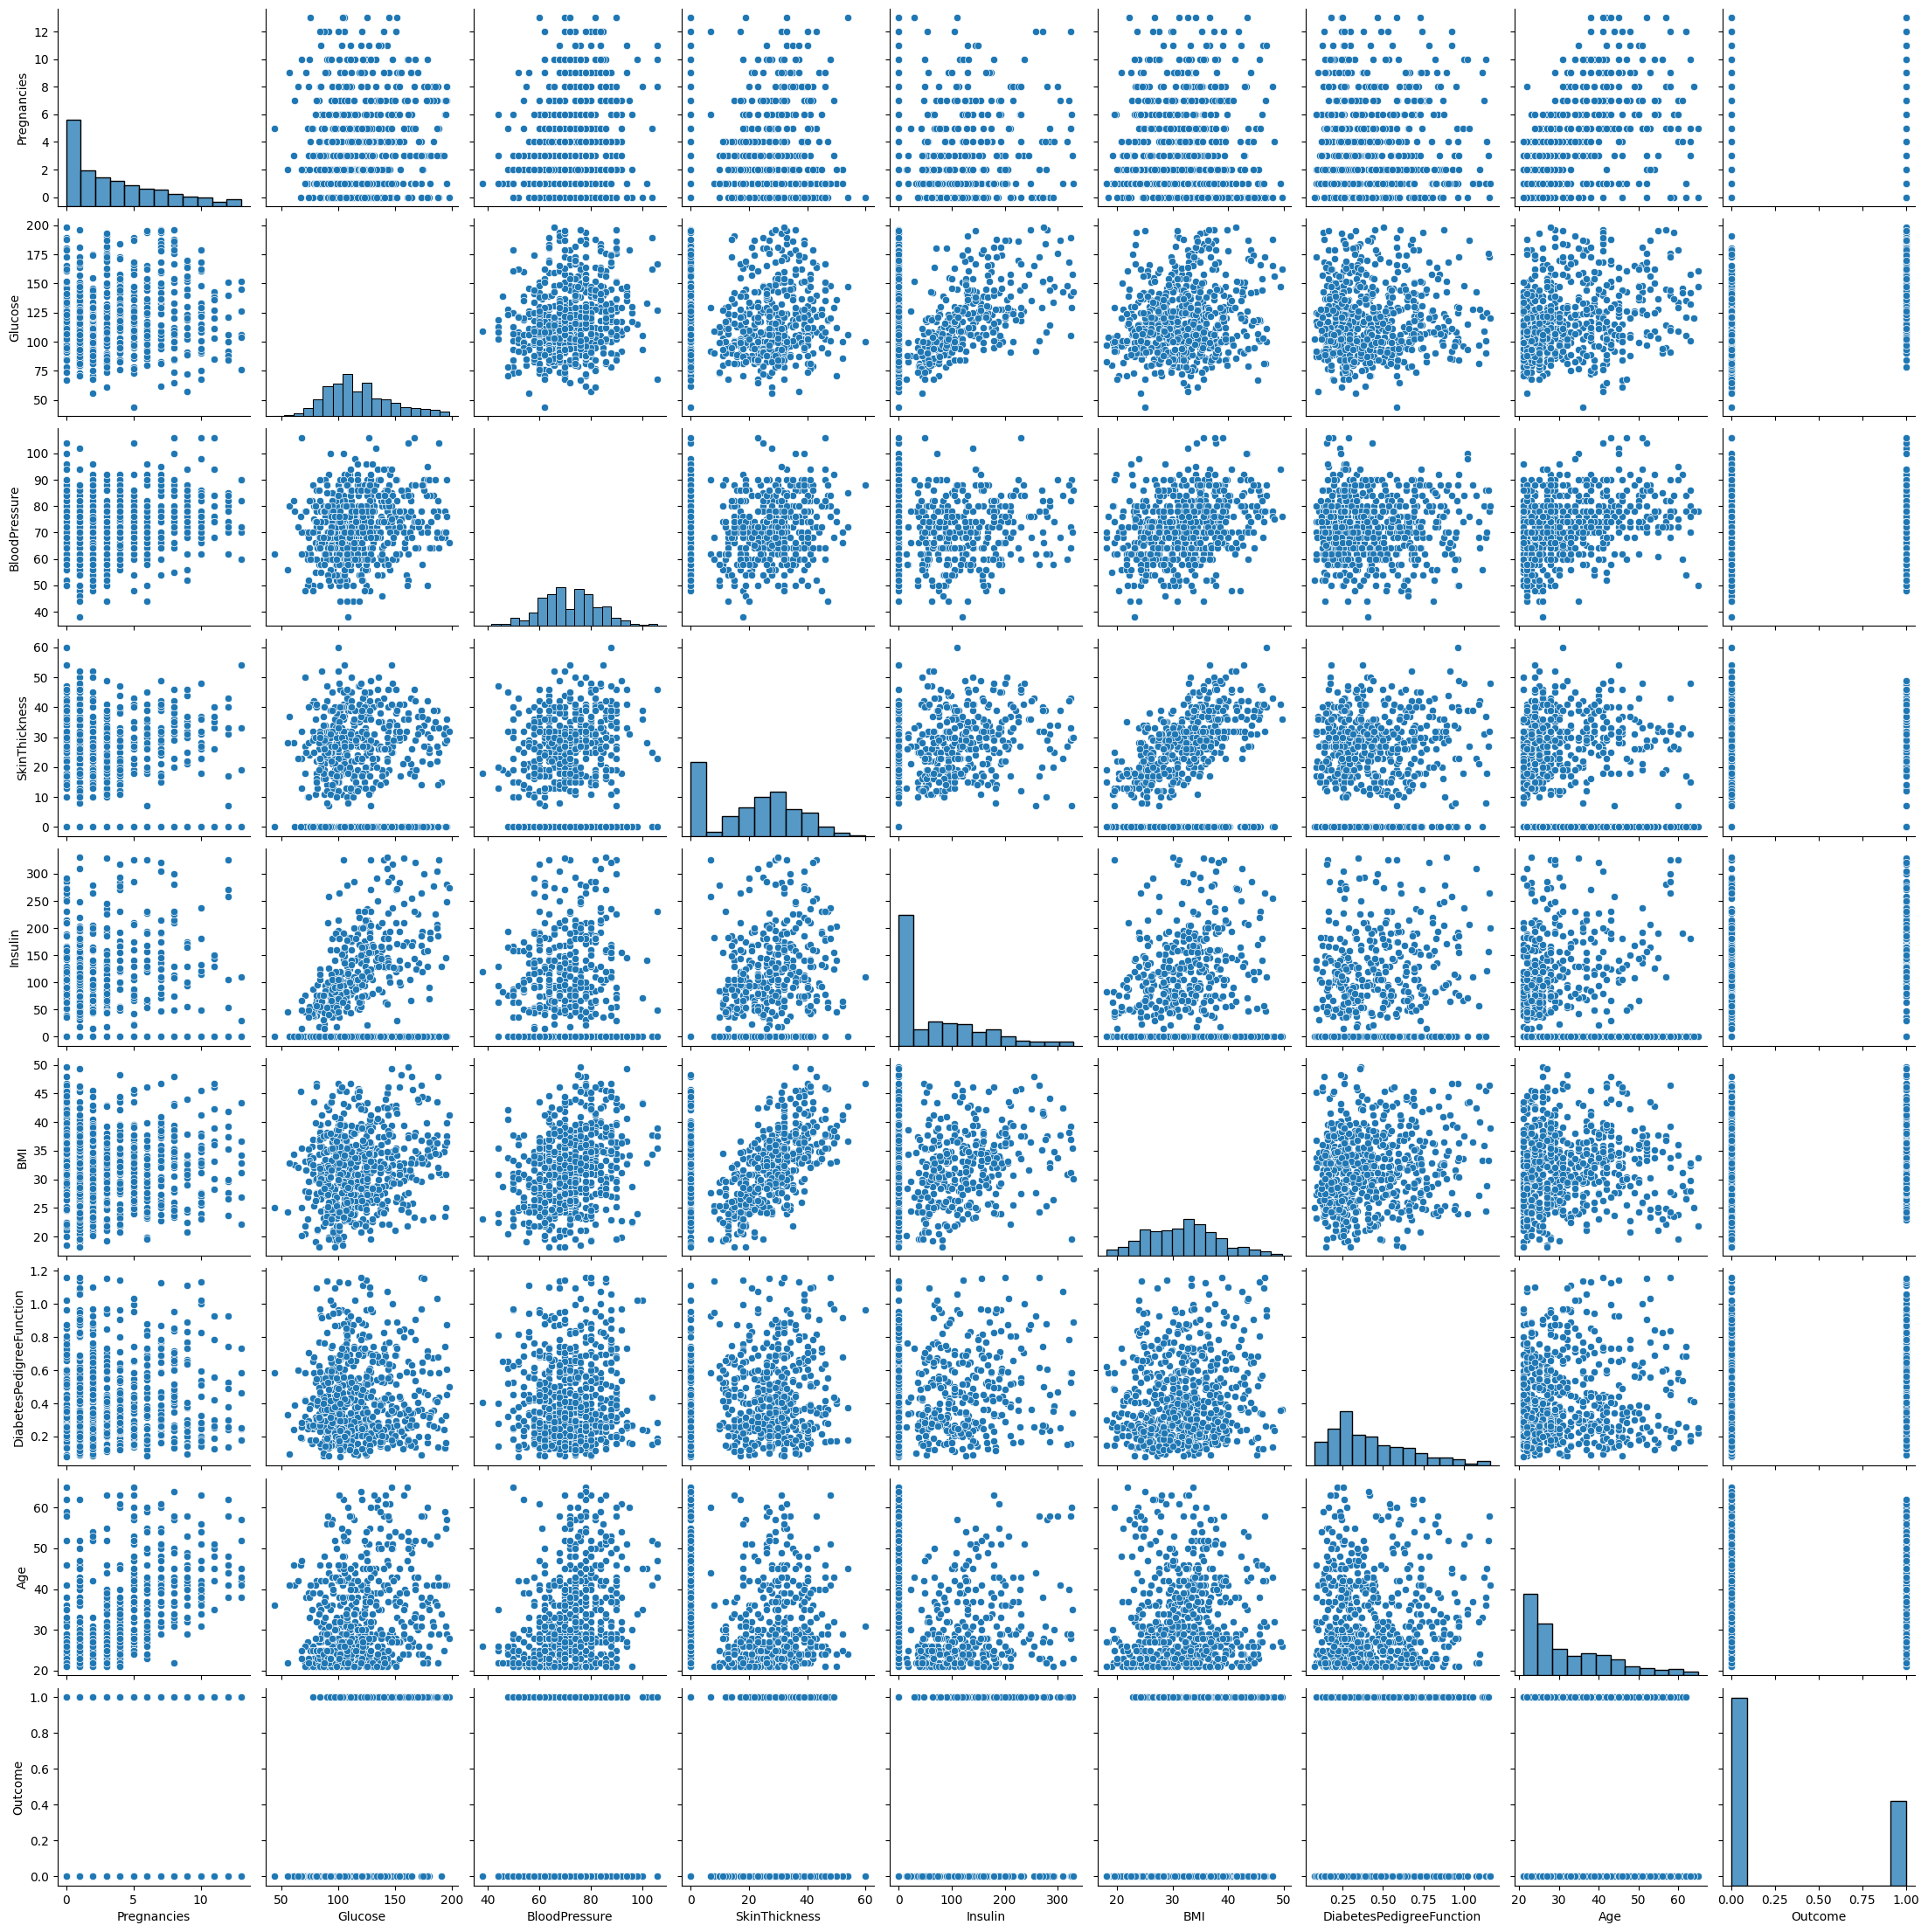

In [40]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [42]:
#análisis descriptivo

dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000,636.000000
mean,3.786164,118.869497,72.007862,20.745283,69.017296,31.964151,0.426237,32.555031,0.309748
std,3.251388,28.996773,11.301102,15.231688,83.601857,6.384132,0.245088,10.879807,0.462754
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.238750,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,42.500000,32.000000,0.361000,29.000000,0.000000
75%,6.000000,136.250000,80.000000,32.000000,122.000000,36.000000,0.583000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,330.000000,49.600000,1.162000,65.000000,1.000000


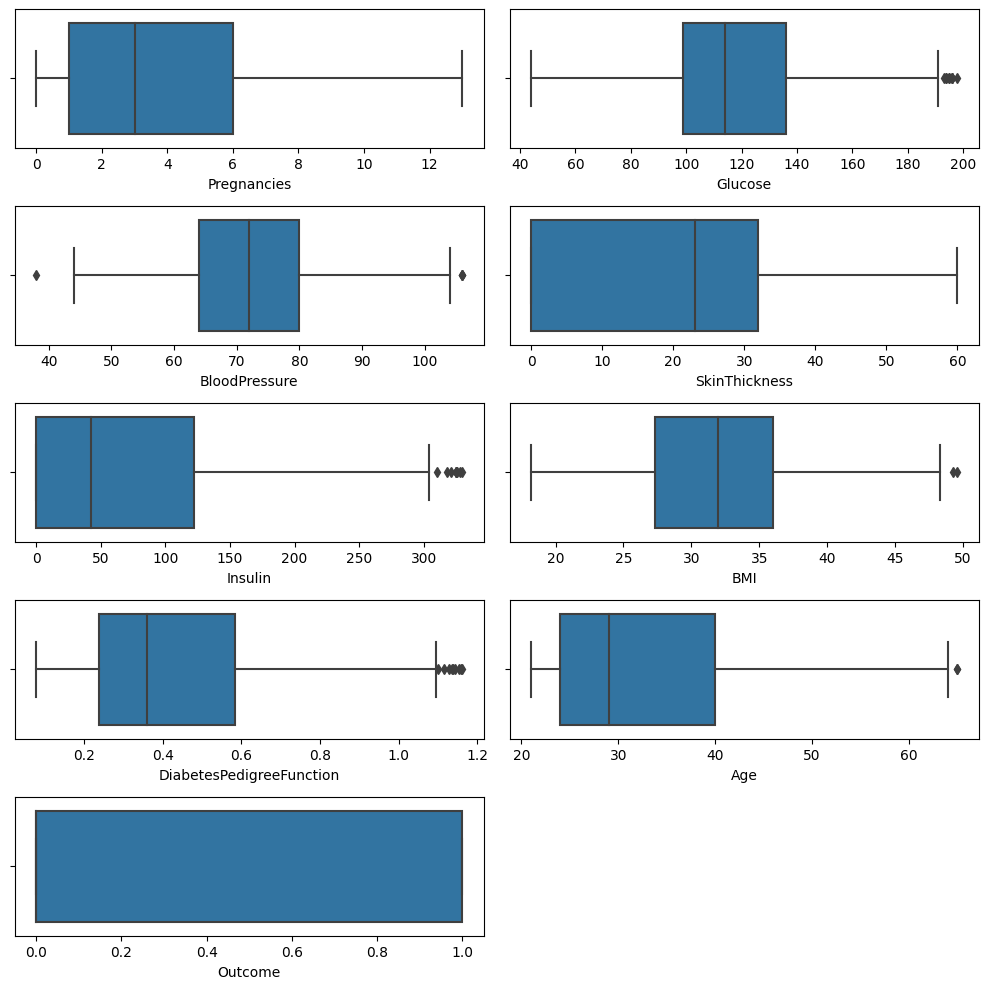

In [43]:
#Buscar outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas a incluir en el análisis
numeric_variables_diabetes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Calcular el número necesario de filas y columnas para organizar los gráficos
num_rows_diabetes = (len(numeric_variables_diabetes) + 1) // 2  # Sumamos 1 para redondear hacia arriba

# Crear una figura de subplots con dos columnas y filas necesarias
fig_diabetes, axis_diabetes = plt.subplots(num_rows_diabetes, 2, figsize=(10, 2*num_rows_diabetes))

# Aplanar el array de ejes para facilitar el acceso a cada gráfico
axis_diabetes = axis_diabetes.flatten()

# Generar los gráficos de caja para identificar outliers en las variables numéricas
for i, var in enumerate(numeric_variables_diabetes):
    sns.boxplot(ax=axis_diabetes[i], data=dataframe, x=var)

# Si hay un número impar de variables, eliminar el último eje vacío
if len(numeric_variables_diabetes) % 2 != 0:
    fig_diabetes.delaxes(axis_diabetes[-1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [44]:
# Analizar outliers para cada variable seleccionada
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

for variable in numeric_variables:
    variable_stats = dataframe[variable].describe()
    print(variable_stats)

    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"- Los límites superior e inferior para la búsqueda de outliers en {variable} son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(variable_iqr, 2)}\n")


count    636.000000
mean       3.786164
std        3.251388
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.000000
Name: Pregnancies, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Pregnancies son 13.5 y -6.5, con un rango intercuartílico de 5.0

count    636.000000
mean     118.869497
std       28.996773
min       44.000000
25%       99.000000
50%      114.000000
75%      136.250000
max      198.000000
Name: Glucose, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en Glucose son 192.12 y 43.12, con un rango intercuartílico de 37.25

count    636.000000
mean      72.007862
std       11.301102
min       38.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      106.000000
Name: BloodPressure, dtype: float64
- Los límites superior e inferior para la búsqueda de outliers en BloodPressure son 104.0 y 40.0, con un rango intercuartílico de 16.0

count    636.000000

In [98]:
#eliminar outtliers

for variable in numeric_variables:
    # Obtener los límites para la búsqueda de outliers en la variable actual
    variable_stats = dataframe[variable].describe()
    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr
    
    # Eliminar outliers para la variable actual
    dataframe = dataframe[(dataframe[variable] >= lower_limit) & (dataframe[variable] <= upper_limit)]

# Mostrar el resumen estadístico actualizado para todas las variables
print(dataframe.describe())








       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   139.000000  139.000000     139.000000     139.000000  139.000000   
mean      4.194245  123.136691      85.143885      21.446043   63.848921   
std       3.694645   26.526771       4.289456      17.119432   82.083990   
min       0.000000   57.000000      80.000000       0.000000    0.000000   
25%       1.000000  105.500000      82.000000       0.000000    0.000000   
50%       4.000000  123.000000      84.000000      25.000000    0.000000   
75%       7.000000  140.500000      88.000000      35.500000  122.500000   
max      13.000000  186.000000      96.000000      60.000000  285.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  139.000000                139.000000  139.000000  139.000000  
mean    33.891367                  0.421439   34.374101    0.366906  
std      6.440615                  0.239128   10.581823    0.483704  
min     19.300000                  

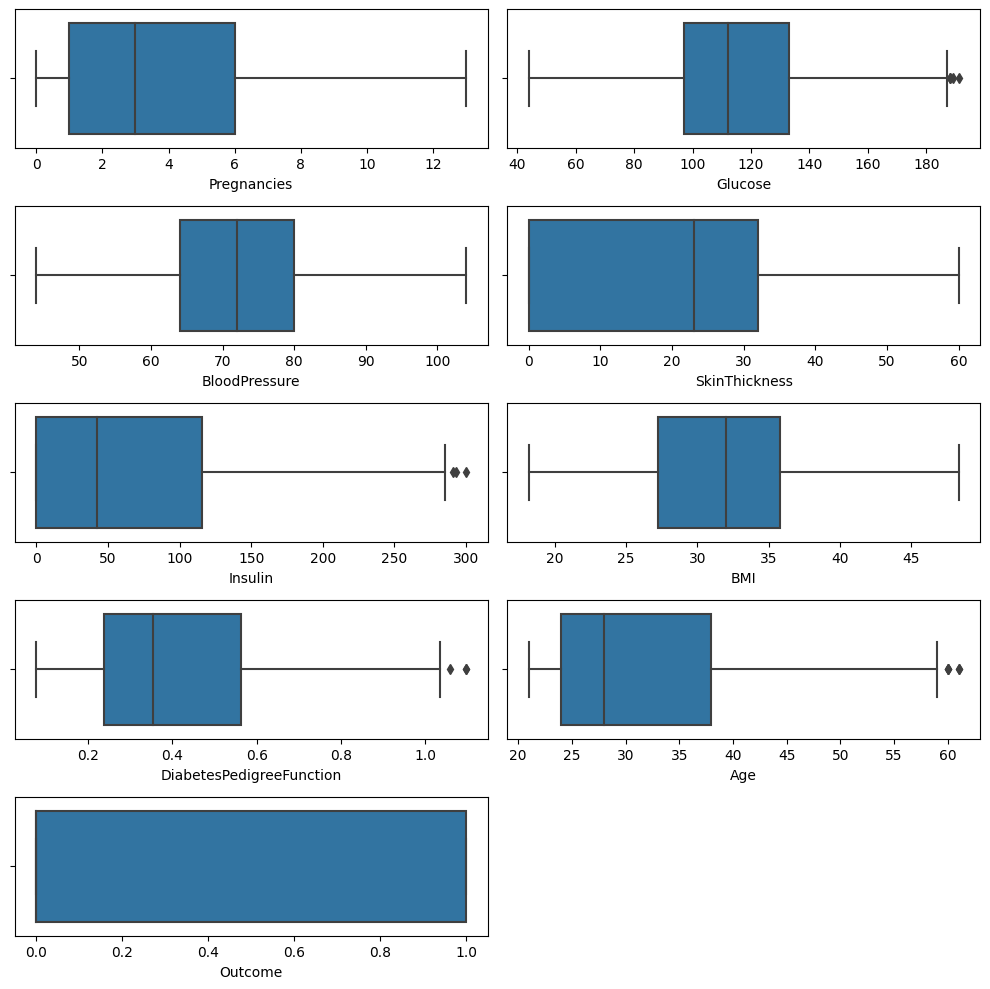

In [46]:
#volvemos a imprimir graficas para comprobar eliminacion de outliers

# Calcular el número necesario de filas y columnas para organizar los gráficos
num_rows = (len(numeric_variables) + 1) // 2  # Sumamos 1 para redondear hacia arriba

# Crear una figura de subplots con dos columnas y filas necesarias
fig, axis = plt.subplots(num_rows, 2, figsize=(10, 2*num_rows))

# Aplanar el array de ejes para facilitar el acceso a cada gráfico
axis = axis.flatten()

# Generar los gráficos de caja para identificar outliers en las variables numéricas
for i, variable in enumerate(numeric_variables):
    plt.sca(axis[i])  # Set the current Axes
    sns.boxplot(data=dataframe, x=variable)

# Si hay un número impar de variables, eliminar el último eje vacío
if len(numeric_variables) % 2 != 0:
    fig.delaxes(axis[-1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [99]:
#Análisis de valores faltantes

dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [100]:
#escalado de valores (feature scaling)


#Normalización

from sklearn.preprocessing import StandardScaler

# Variables numéricas seleccionadas
numeric_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                              'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Crear un DataFrame con las variables numéricas seleccionadas
dataframe_selected = dataframe[numeric_variables]

# Normalizar las variables numéricas
scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe_selected)

# Crear un DataFrame con las variables normalizadas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe_selected.index, columns=numeric_variables)
dataframe_norm.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
10,-0.052765,-0.497015,1.604145,-1.257262,-0.780662,0.577902,-0.967148,-0.414855,-0.761279
16,-1.139328,-0.194342,-0.267638,1.498086,2.031480,1.855677,0.543766,-0.320011,1.313579
20,-0.324406,0.108331,0.668254,1.146339,2.092614,0.842807,1.185904,-0.699385,-0.761279
21,1.033799,-0.913190,-0.267638,-1.257262,-0.780662,0.235085,-0.140342,1.482014,-0.761279
23,1.305440,-0.156508,-1.203530,0.794593,-0.780662,-0.762203,-0.664965,-0.509698,1.313579
24,1.848721,0.751511,2.072091,0.677344,1.004437,0.422076,-0.702738,1.576858,1.313579
28,2.392003,0.827179,-0.735584,-0.143398,0.564276,-1.821821,-0.740511,2.145918,-0.761279
29,0.218876,-0.232176,1.604145,-1.257262,-0.780662,0.032511,-0.354388,0.343893,-0.761279
33,0.490517,-1.178029,1.604145,-1.257262,-0.780662,-2.180222,-0.979739,-0.604542,-0.761279
41,0.762158,0.373169,-0.267638,-1.257262,-0.780662,0.983050,1.152328,0.249049,-0.761279


In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = dataframe_norm.drop('Outcome', axis = 1)
y = dataframe_norm['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()



,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.108331,1.481694,0.678069,0.723267
1,-0.005172,-0.294725,0.090492,-0.035481
2,-0.648351,-1.743908,-0.782481,1.292327
3,-0.913190,-2.273718,-0.576828,-0.414855
4,-0.459181,2.011503,2.113437,1.007797


In [102]:
X_test_sel.head()


,Glucose,BMI,DiabetesPedigreeFunction,Age
0,-0.118674,1.310285,1.525860,1.292327
1,1.583861,-0.544047,-0.501283,1.387171
2,0.259667,0.811642,2.243544,0.249049
3,0.827179,0.624650,0.904706,0.533580
4,-1.669872,-1.323178,0.678069,-1.173602


In [103]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)
X_train_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\src\train_outcome.csv", index=False)
X_test_sel.to_csv(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\src\test_outcome.csv", index=False)



## Paso 3: Construye un modelo de árbol de decisión

In [104]:
# Paso 1. Lectura del conjunto de datos procesado


import pandas as pd
from sklearn.model_selection import train_test_split

# Cargando el nuevo conjunto de datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
data = pd.read_csv(url)

# Dividiendo el conjunto de datos en características (X) y etiquetas (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrando las primeras filas del conjunto de entrenamiento
print(X_train.head())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  


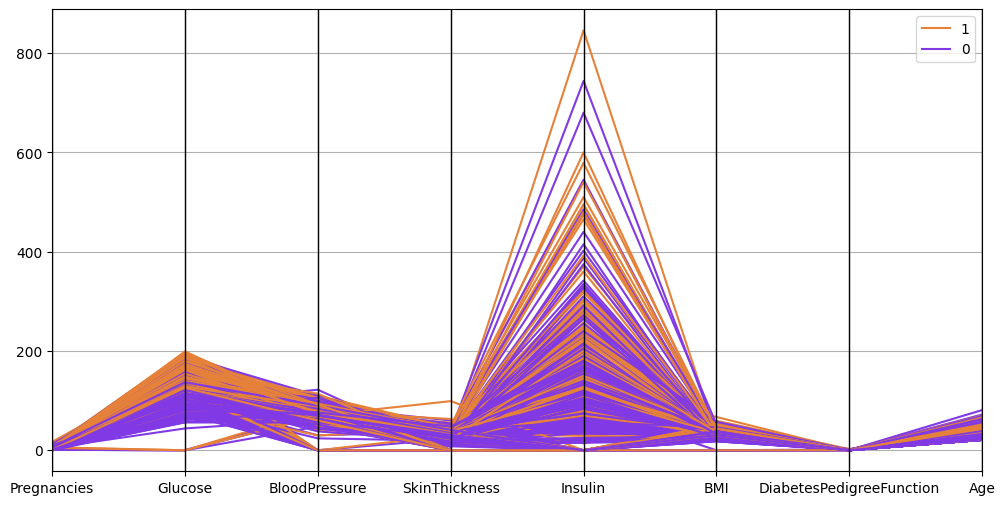

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

total_data = X
total_data["Outcome"] = y

# Ajustar el tamaño de la figura para hacerla más ancha
plt.figure(figsize=(12, 6))

# Crear el gráfico de coordenadas paralelas
pd.plotting.parallel_coordinates(total_data, "Outcome", color=("#E58139", "#8139E5"))

plt.show()

In [106]:
# Paso 2: Inicialización y entrenamiento del modelo¶

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

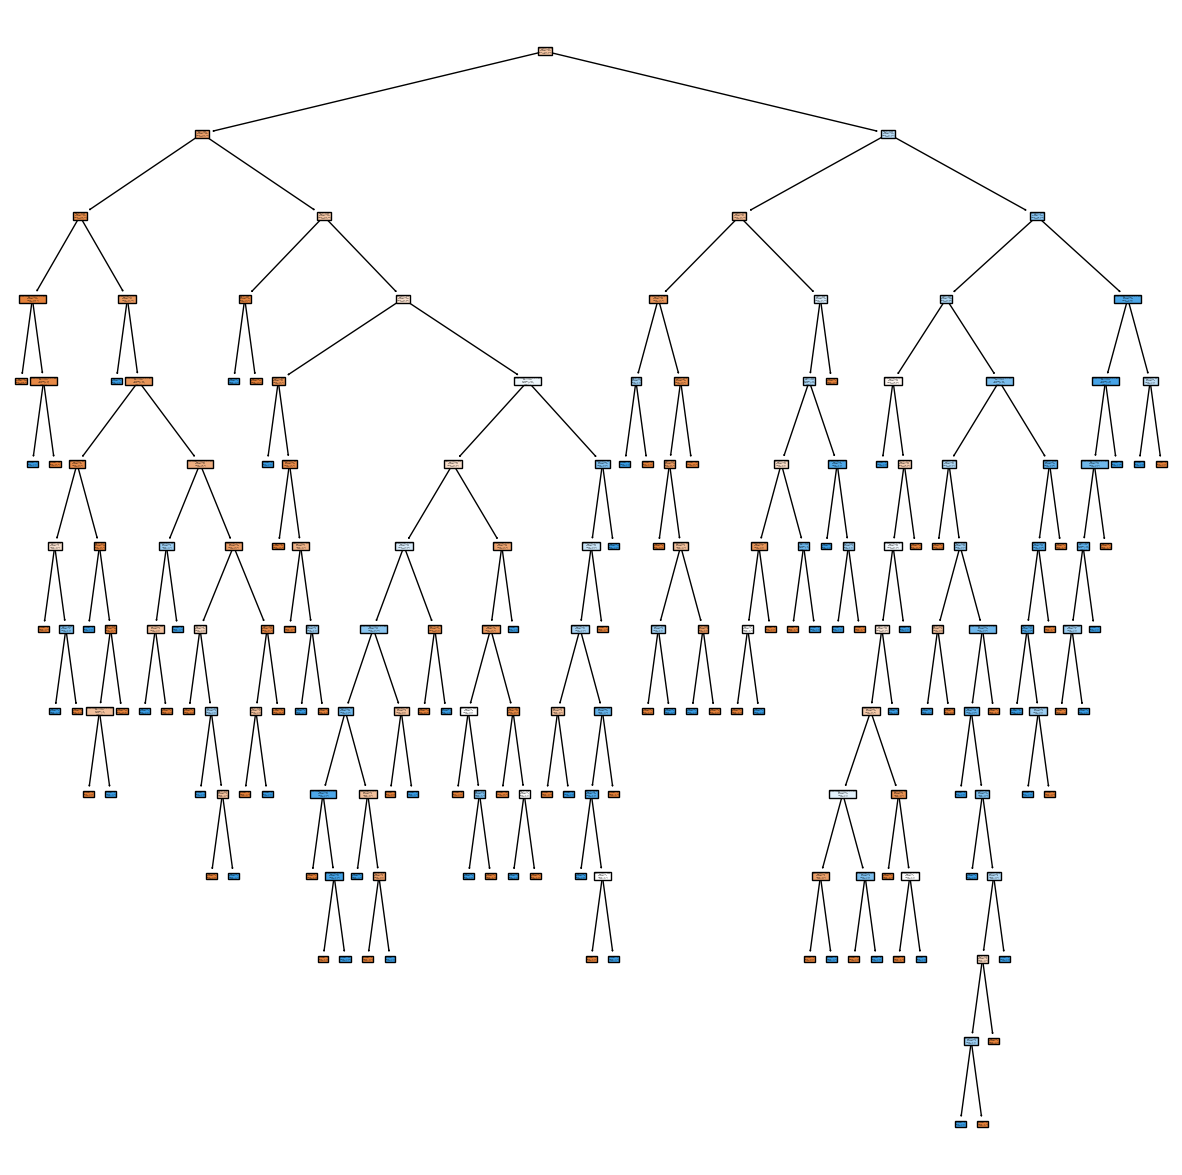

In [107]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [108]:
# Paso 3: Predicción del modelo¶

y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [109]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7467532467532467

In [110]:
# Paso 4: Guardado del modelo¶

from pickle import dump

dump(model, open(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\models\decision_tree_classifier_default_42.sav", "wb"))

## paso 4: Optimización de hiperparámetros con GRID SEARCH


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definimos los parámetros a mano que queremos ajustar
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Inicializamos el modelo (DecisionTreeClassifier) que queremos utilizar
model = DecisionTreeClassifier(random_state=42)

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5)
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [112]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [113]:
# repetimos el entrenamiento estableciendo los mejores hiperparámetros

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the best hyperparameters obtained from the grid search
best_params = {
    "criterion": "gini",
    "max_depth": 5,
    "min_samples_leaf": 2,
    "min_samples_split": 2,
    "random_state": 42
}

# Initialize the DecisionTreeClassifier with the best hyperparameters
model_tree = DecisionTreeClassifier(**best_params)

# Train the model on the training data
model_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_tree.predict(X_test)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:}")

Test accuracy: 0.7857142857142857


conclusiones:
- hemos hecho una mejora en el modelo de aproximadamente del 5.21%, por lo que es una mejora significativa y positiva

## Paso 5: Guarda el modelo

In [114]:
# Guardado del modelo

from pickle import dump

dump(model, open(r"C:\Users\Jaime\Desktop\4GEEKS\PROYECTOS\017-PROYECTO1-decission-trees-diabetes-main\models\decision_tree_classifier_default_42.sav", "wb"))